In [2]:
import pandas as pd

# Charger le dataset
df = pd.read_csv('HRDataset_v14.csv')

# Afficher les premières lignes
print(df.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

## Verification et Nettoyage des donnees

In [3]:
# Vérifier les infos sur les colonnes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [5]:
# Supprimer les lignes avec valeurs manquantes (ou les remplacer)
df = df.dropna()  # Ou df.fillna(valeur)

In [6]:
# Vérifier les doublons
print(df.duplicated().sum())

0


In [7]:
# Vérifier les types de colonnes
print(df.dtypes)

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [8]:
# Statistiques descriptives générales
print(df.describe())

              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    104.000000  104.000000       104.000000  104.000000   104.000000   
mean   10167.701923    0.451923         0.942308    0.423077     4.788462   
std       89.400146    0.500093         0.943315    0.496440     0.633576   
min    10004.000000    0.000000         0.000000    0.000000     1.000000   
25%    10090.750000    0.000000         0.000000    0.000000     5.000000   
50%    10170.500000    0.000000         1.000000    0.000000     5.000000   
75%    10249.750000    1.000000         1.000000    1.000000     5.000000   
max    10305.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  Termd  \
count  104.000000   104.000000              104.000000     104.000000  104.0   
mean     4.711538     2.903846                0.153846   65690.076923    1.0   
std      0.920881     0.566358                0.362548   18679.799

In [9]:
print(df["PerformanceScore"].unique())   #PIP=Performance Improvement Plan

['Fully Meets' 'Needs Improvement' 'PIP' 'Exceeds']


In [10]:
mapping = {
    "PIP": 1,
    "Needs Improvement": 2,
    "Fully Meets": 3,
    "Exceeds": 4
}

df["PerformanceScore"] = df["PerformanceScore"].map(mapping)

print(df["PerformanceScore"].unique())  # Doit afficher [1, 2, 3, 4]
#print(df.info())  # Vérifie que la colonne est bien de type numérique

[3 2 1 4]


In [11]:
# Affichage des mesures spécifiques
print("Moyenne :", df["PerformanceScore"].mean())
print("Médiane :", df["PerformanceScore"].median())
print("Mode :", df["PerformanceScore"].mode()[0])
print("Écart-type :", df["PerformanceScore"].std())

Moyenne : 2.8846153846153846
Médiane : 3.0
Mode : 3
Écart-type : 0.5962291262787754


In [12]:
print(df["PerformanceScore"].describe())  # Moyenne, médiane, min, max, etc.

count    104.000000
mean       2.884615
std        0.596229
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: PerformanceScore, dtype: float64


## INTERPRETATIONS
#### count = 104; 
-> Il y a en tout 104 employes dans cette analyse.
#### mean = 2.88 (~=3); 
-> La moyenne des performances des employes est proche de 3 ("Fully Meets") ce qui signifie qu'en moyenne, les employes repondent pleinement aux attentes.
#### std = 0.60; 
-> Un ecart-type faible comme celui-ci signifie que les scores de performances sont peu disperses autour de la moyenne.
#### 25%(1er quartile) = 3; 
-> Seulement 25% des employes enregistrent un score de performance inferieur a la moyenne, ce qui signifie que moins du quart des employes est en difficulte pour fournir des resultats convenables
#### 50%(Mediane) = 3 & 75%(3e quartile) = 3; 
-> La majorite des employes a un score egale a 3
#### max = 4; 
-> Quelques employes se demarquent avec des performances elevees("Exceeds")

## Visualisation de la distribution des performances

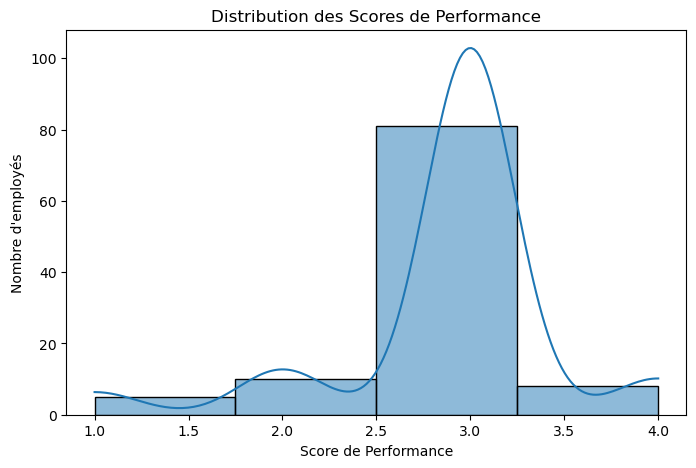

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme
plt.figure(figsize=(8,5))
sns.histplot(df["PerformanceScore"], bins=4, kde=True)
plt.title("Distribution des Scores de Performance")
plt.xlabel("Score de Performance")
plt.ylabel("Nombre d'employés")
plt.show()

## INTERPRETATION

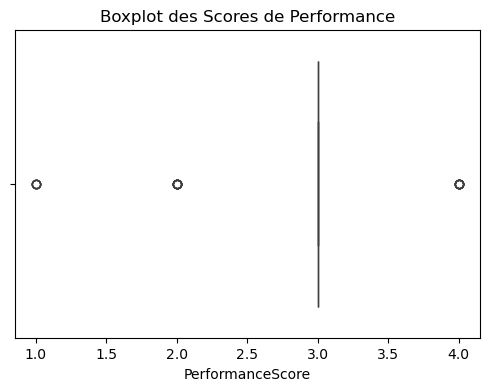

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["PerformanceScore"])
plt.title("Boxplot des Scores de Performance")
plt.show()


In [15]:
Q1 = df["PerformanceScore"].quantile(0.25)
Q3 = df["PerformanceScore"].quantile(0.75)
IQR = Q3 - Q1

# Seuils pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
outliers = df[(df["PerformanceScore"] < lower_bound) | (df["PerformanceScore"] > upper_bound)]
print(f"Nombre d'outliers détectés : {len(outliers)}")


Nombre d'outliers détectés : 23


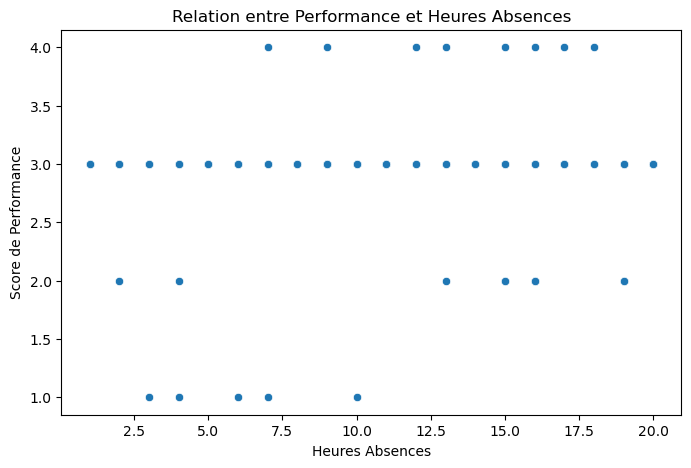

In [16]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Absences"], y=df["PerformanceScore"])
plt.title("Relation entre Performance et Heures Absences")
plt.xlabel("Heures Absences")
plt.ylabel("Score de Performance")
plt.show()

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["Department"], y=df["PerformanceScore"], errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Performance Score by Department
plt.xlabel("Department")
plt.ylabel("Score Moyen")
plt.show()


SyntaxError: unterminated string literal (detected at line 4) (1722225446.py, line 4)